In [272]:
import ipyparallel as ipp
c = ipp.Client(profile='mpi')
view = c[:]
view.activate()
view.block = True  # equivalent to running with %%px --block

# Set the working directory:
import os
view["cwd"] = os.getcwd()
%px cd $cwd

[stdout:0] /Users/nmshafie
[stdout:1] /Users/nmshafie
[stdout:2] /Users/nmshafie
[stdout:3] /Users/nmshafie


In [273]:
%%px

import bodo
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [274]:
import bodo
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [275]:
#loading all the csv data

start = time.time()

nyc_parking_2016 = pd.read_csv('data/Parking_Violations_Issued_-_Fiscal_Year_2016.csv', 
                               dtype ={17: 'str',18: 'str',20: 'str',21: 'str',22:'str',
                                       23: 'str',29: 'str',30: 'str',31: 'str',32: 'str',
                                       34: 'str',36: 'str',38: 'str',39: 'str',21:'str'}, 
                               parse_dates=['Issue Date'])

nyc_parking_2017 = pd.read_csv('data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv', 
                               dtype = {18: 'str', 38: 'str'}, parse_dates=['Issue Date'])
violation_codes = pd.read_csv("data/DOF_Parking_Violation_Codes.csv")
nyc_precincts_df = pd.read_csv("data/nyc_precincts.csv", index_col='index')

end = time.time()

print("Reading Time: ", end - start)

Reading Time:  122.54645705223083


In [276]:
%%px

@bodo.jit(distributed = ["nyc_parking_2016", "nyc_parking_2017"], cache=True)
def load_data():
    
    start = time.time()
    nyc_parking_2016 = pd.read_csv('data/Parking_Violations_Issued_-_Fiscal_Year_2016.csv', 
                               dtype ={17: 'str',18: 'str',20: 'str',21: 'str',22:'str',
                                       23: 'str',29: 'str',30: 'str',31: 'str',32: 'str',
                                       34: 'str',36: 'str',38: 'str',39: 'str',21:'str'}, 
                               parse_dates=['Issue Date'])
    nyc_parking_2017 = pd.read_csv('data/Parking_Violations_Issued_-_Fiscal_Year_2017.csv', 
                               dtype = {18: 'str', 38: 'str'}, parse_dates=['Issue Date'])
    violation_codes = pd.read_csv("data/DOF_Parking_Violation_Codes.csv")
    violation_codes.columns = ['Violation Code','Definition','manhattan_96_and_below','all_other_areas']
    nyc_precincts_df = pd.read_csv("data/nyc_precincts.csv", index_col='index')

    end = time.time()
    
    print("Reading Time: ", end - start)
    return nyc_parking_2016, nyc_parking_2017, violation_codes, nyc_precincts_df   

nyc_parking_2016, nyc_parking_2017, violation_codes, nyc_precincts_df= load_data()

[stdout:0] Reading Time:  82.38469471899589


In [277]:
nyc_parking_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10626899 entries, 0 to 10626898
Data columns (total 51 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Summons Number                     int64         
 1   Plate ID                           object        
 2   Registration State                 object        
 3   Plate Type                         object        
 4   Issue Date                         datetime64[ns]
 5   Violation Code                     int64         
 6   Vehicle Body Type                  object        
 7   Vehicle Make                       object        
 8   Issuing Agency                     object        
 9   Street Code1                       int64         
 10  Street Code2                       int64         
 11  Street Code3                       int64         
 12  Vehicle Expiration Date            float64       
 13  Violation Location                 float64       
 14  

In [278]:
nyc_parking_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10803028 entries, 0 to 10803027
Data columns (total 43 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Summons Number                     int64         
 1   Plate ID                           object        
 2   Registration State                 object        
 3   Plate Type                         object        
 4   Issue Date                         datetime64[ns]
 5   Violation Code                     int64         
 6   Vehicle Body Type                  object        
 7   Vehicle Make                       object        
 8   Issuing Agency                     object        
 9   Street Code1                       int64         
 10  Street Code2                       int64         
 11  Street Code3                       int64         
 12  Vehicle Expiration Date            int64         
 13  Violation Location                 float64       
 14  

In [279]:
violation_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CODE                    86 non-null     int64 
 1   DEFINITION              86 non-null     object
 2   MANHATTAN_96_AND_BELOW  86 non-null     int64 
 3   ALL_OTHER_AREAS         86 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.8+ KB


In [280]:
nyc_precincts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Violation Precinct  77 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [281]:
%%px

@bodo.jit(distributed=['df'], cache=True)
def head(df):
    print(df.head(5))
    

In [282]:
%%px

head(nyc_parking_2016)

[stdout:0] 
   Summons Number Plate ID Registration State Plate Type Issue Date  \
0      1363745270  GGY6450                 99        PAS 2015-07-09   
1      1363745293   KXD355                 SC        PAS 2015-07-09   
2      1363745438  JCK7576                 PA        PAS 2015-07-09   
3      1363745475  GYK7658                 NY        OMS 2015-07-09   
4      1363745487  GMT8141                 NY        PAS 2015-07-09   

   Violation Code Vehicle Body Type Vehicle Make Issuing Agency  Street Code1  \
0              46               SDN        HONDA              P             0   
1              21              SUBN        CHEVR              P         55730   
2              21               SDN        ME/BE              P         42730   
3              21              SUBN        NISSA              P         58130   
4              21               P-U        LINCO              P         58130   

   ...  Hydrant Violation  Double Parking Violation  Latitude  Longitude  

In [283]:
%%px

head(nyc_parking_2017)

[stdout:0] 
   Summons Number Plate ID Registration State Plate Type Issue Date  \
0      5092469481  GZH7067                 NY        PAS 2016-07-10   
1      5092451658  GZH7067                 NY        PAS 2016-07-08   
2      4006265037  FZX9232                 NY        PAS 2016-08-23   
3      8478629828  66623ME                 NY        COM 2017-06-14   
4      7868300310  37033JV                 NY        COM 2016-11-21   

   Violation Code Vehicle Body Type Vehicle Make Issuing Agency  Street Code1  \
0               7              SUBN        TOYOT              V             0   
1               7              SUBN        TOYOT              V             0   
2               5              SUBN         FORD              V             0   
3              47              REFG        MITSU              T         10610   
4              69              DELV        INTER              T         10510   

   ...  Vehicle Color  Unregistered Vehicle?  Vehicle Year  Meter Number  

In [284]:
%%px

head(violation_codes)

[stdout:0] 
   Violation Code                                         Definition  \
0              10  Stopping, standing or parking where a sign, st...   
1              11  Hotel Loading/Unloading: Standing or parking w...   
2              12  Snow Emergency: Standing or parking where stan...   
3              13  Taxi Stand: Standing or parking where standing...   
4              14  General No Standing: Standing or parking where...   

   manhattan_96_and_below  all_other_areas  
0                     115              115  
1                     115              115  
2                      95               95  
3                     115              115  
4                     115              115  


In [285]:
%%px

head(nyc_precincts_df)

[stdout:0] 
       Violation Precinct
index                    
0                       1
1                       5
2                       6
3                       7
4                       9


In [286]:
nyc_parking_2016.describe()

,Summons Number,Violation Code,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
count,1.062690e+07,1.062690e+07,1.062690e+07,1.062690e+07,1.062690e+07,1.062690e+07,8.758243e+06,1.062690e+07,1.062690e+07,1.062690e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,6.528467e+09,3.477333e+01,2.451093e+04,2.077949e+04,2.105112e+04,2.557483e+07,5.500073e+01,4.532929e+01,4.752599e+01,3.444605e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.138312e+09,1.923122e+01,2.233289e+04,2.168472e+04,2.184546e+04,2.677891e+07,3.800069e+01,4.035501e+01,6.167253e+01,2.253115e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.002890e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.088268e+09,2.000000e+01,7.830000e+03,0.000000e+00,0.000000e+00,2.015093e+07,1.900000e+01,9.000000e+00,6.000000e+00,3.454490e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.497980e+09,3.600000e+01,1.849000e+04,1.451000e+04,1.488000e+04,2.016091e+07,4.900000e+01,3.300000e+01,2.800000e+01,3.573380e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.026645e+09,4.000000e+01,3.555000e+04,3.423000e+04,3.437000e+04,2.017073e+07,8.800000e+01,7.800000e+01,7.800000e+01,3.618890e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,8.470901e+09,9.900000e+01,9.826000e+04,9.831000e+04,9.828000e+04,8.888889e+07,9.900000e+02,9.900000e+02,9.990000e+02,9.999860e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
nyc_parking_2017.describe()

,Summons Number,Violation Code,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Date First Observed,Law Section,Unregistered Vehicle?,Vehicle Year,Feet From Curb,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
count,1.080303e+07,1.080303e+07,1.080303e+07,1.080303e+07,1.080303e+07,1.080303e+07,8.730628e+06,1.080303e+07,1.080303e+07,1.080303e+07,1.080303e+07,1.080303e+07,1127596.0,1.080303e+07,1.080303e+07,0.0,0.0,0.0
mean,6.817447e+09,3.459943e+01,2.386658e+04,2.031056e+04,2.034464e+04,2.443571e+07,5.569676e+01,4.501216e+01,4.682931e+01,3.367644e+05,4.508346e+05,5.511725e+02,0.0,1.578155e+03,1.200056e-01,NaN,NaN,NaN
std,2.320234e+09,1.935987e+01,2.266690e+04,2.194577e+04,2.201347e+04,2.604802e+07,3.794433e+01,4.055256e+01,6.266704e+01,2.253806e+05,2.981223e+06,2.950681e+02,0.0,8.255067e+02,8.288494e-01,NaN,NaN,NaN
min,1.002885e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,5.092096e+09,2.000000e+01,5.580000e+03,0.000000e+00,0.000000e+00,2.016072e+07,1.900000e+01,7.000000e+00,1.000000e+00,3.452390e+05,0.000000e+00,4.080000e+02,0.0,1.999000e+03,0.000000e+00,NaN,NaN,NaN
50%,8.108004e+09,3.600000e+01,1.809000e+04,1.382000e+04,1.383000e+04,2.017083e+07,5.000000e+01,3.300000e+01,2.800000e+01,3.581730e+05,0.000000e+00,4.080000e+02,0.0,2.008000e+03,0.000000e+00,NaN,NaN,NaN
75%,8.485854e+09,4.000000e+01,3.548000e+04,3.373000e+04,3.397000e+04,2.018072e+07,9.000000e+01,7.800000e+01,7.800000e+01,3.631380e+05,0.000000e+00,4.080000e+02,0.0,2.014000e+03,0.000000e+00,NaN,NaN,NaN
max,8.585600e+09,9.900000e+01,9.802000e+04,9.831000e+04,9.828000e+04,8.888889e+07,9.330000e+02,9.330000e+02,9.970000e+02,9.999920e+05,2.022061e+07,6.408000e+03,0.0,2.069000e+03,1.600000e+01,NaN,NaN,NaN


In [288]:
violation_codes.describe()

,CODE,MANHATTAN_96_AND_BELOW,ALL_OTHER_AREAS
count,86.000000,86.000000,86.000000
mean,50.453488,89.709302,83.430233
std,27.576911,34.139460,42.573546
min,4.000000,0.000000,0.000000
25%,26.250000,65.000000,45.000000
50%,50.500000,95.000000,80.000000
75%,72.750000,115.000000,115.000000
max,99.000000,265.000000,265.000000


In [289]:
nyc_precincts_df.describe()

,Violation Precinct
count,77.000000
mean,63.324675
std,36.118388
min,1.000000
25%,32.000000
50%,66.000000
75%,100.000000
max,123.000000


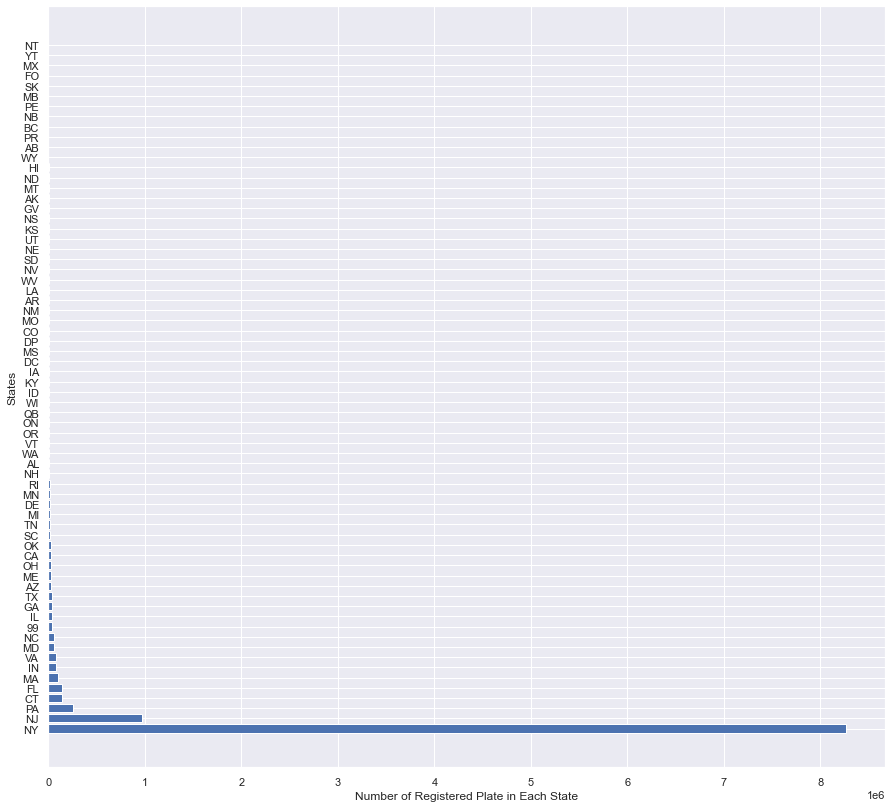

In [290]:
#Barplot of Registration State

reg_states = nyc_parking_2016['Registration State'].value_counts().index
plate_counts = nyc_parking_2016['Registration State'].value_counts()
states_count = np.arange(len(reg_states))

fig = plt.figure(figsize=(15,14))

plt.barh(states_count, plate_counts)
plt.yticks(states_count, reg_states)
plt.xlabel('Number of Registered Plate in Each State')
plt.ylabel('States');

In [291]:
#df['Month'] = df['Issue Date'].dt.month
nyc_parking_2016['Month'] = nyc_parking_2016['Issue Date'].dt.strftime('%b')
nyc_parking_2016['Month'].head()

0    Jul
1    Jul
2    Jul
3    Jul
4    Jul
Name: Month, dtype: object

In [292]:
nyc_parking_2016['Month'].unique()

array(['Jul', 'Jun', 'May', 'Jan', 'Feb', 'Mar', 'Nov', 'Apr', 'Dec',
       'Aug', 'Sep', 'Oct'], dtype=object)

In [293]:
ticket_per_month = nyc_parking_2016.groupby(['Month'])['Plate ID'].count()
ticket_per_month = ticket_per_month.to_frame().reset_index()
ticket_per_month = ticket_per_month.rename(columns={'Plate ID': 'Number of Tickets in Each Month'})
ticket_per_month 

,Month,Number of Tickets in Each Month
0,Apr,901106
1,Aug,902927
2,Dec,767448
3,Feb,840819
4,Jan,815755
5,Jul,885204
6,Jun,649362
7,Mar,1014322
8,May,875085
9,Nov,935684


In [294]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

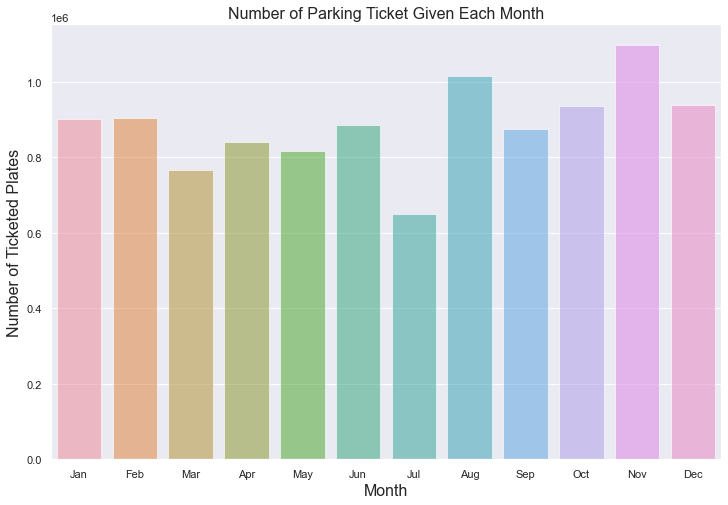

In [295]:
plt.figure(figsize=(12,8))
sns.barplot(x = Months, y = ticket_per_month['Number of Tickets in Each Month'], alpha=0.6)
plt.title("Number of Parking Ticket Given Each Month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of Ticketed Plates", fontsize=16)
plt.show();

In [296]:
nyc_parking_2016['Violation Code'].unique()

array([46, 21, 75, 71, 41, 70, 20, 38, 37, 40, 74, 18, 68, 98, 67, 14, 51,
       24, 66, 80, 19, 10, 62, 78, 16, 61, 91, 50, 48, 27, 56, 53, 17, 45,
       97, 92,  9, 63, 96, 60, 99, 26, 31, 34, 73, 83, 39, 82, 15, 85, 52,
       47, 65, 72, 76, 13,  4, 69, 42, 88,  8, 86, 77, 95, 84, 23, 35, 43,
       49, 11, 79, 89, 33, 81, 22, 55, 59,  5, 90,  6, 64,  3, 87,  2, 29,
       36,  7, 94,  0, 32, 30,  1, 25, 12, 44, 28, 58, 93, 57, 54])

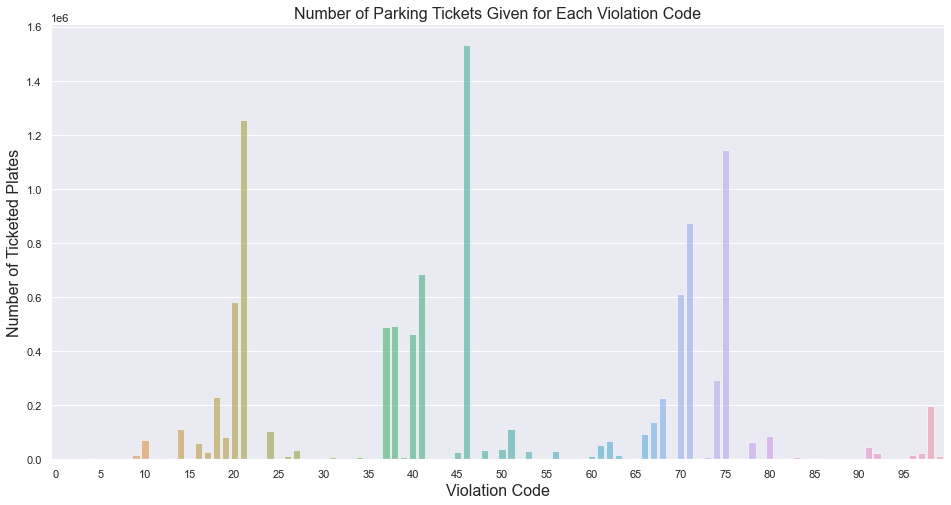

In [297]:
violation_counts = nyc_parking_2016['Violation Code'].value_counts().values
violation_code = nyc_parking_2016['Violation Code'].unique()

plt.figure(figsize=(16,8))
f = sns.barplot(x = violation_code, y = violation_counts, alpha=0.6)

f.set(xticks=np.arange(0,100, 5.0))
plt.title("Number of Parking Tickets Given for Each Violation Code", fontsize=16)
plt.xlabel("Violation Code", fontsize=16)
plt.ylabel("Number of Ticketed Plates", fontsize=16)
plt.show();

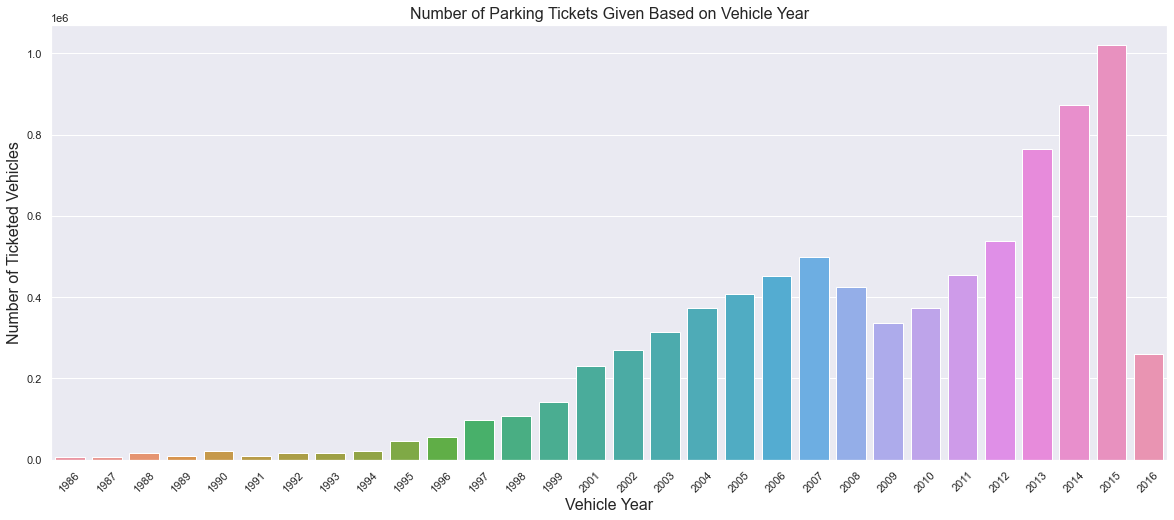

In [298]:
plt.figure(figsize=(20,8))

vehicle_year = nyc_parking_2016[['Vehicle Year', 'Plate ID']].loc[(nyc_parking_2016['Vehicle Year']>1985) 
                                    & (nyc_parking_2016['Vehicle Year'] <= 2016)]
vehicle_year['Vehicle Year'] = vehicle_year['Vehicle Year'].astype(int)

sns.countplot(x = 'Vehicle Year', data = vehicle_year)
plt.title("Number of Parking Tickets Given Based on Vehicle Year", fontsize=16)
plt.xlabel("Vehicle Year", fontsize=16)
plt.ylabel("Number of Ticketed Vehicles", fontsize=16)
plt.xticks(rotation=45);

In [333]:
nyc_parking_2016['hour'] = nyc_parking_2016['Violation Time'].apply(lambda time: time[:2] + ':' + time[2:] if len(str(time)) == 5 else np.nan)
nyc_parking_2016['hour'] = pd.to_datetime(nyc_parking_2016['hour'], errors='coerce').dt.hour
nyc_parking_2016['hour'].unique()

array([10., 12.,  8.,  9., 11., 13., 14., 15., 16., nan,  7.,  2., 19.,
       20.,  1., 17., 18., 21., 23.,  6.,  0.,  3., 22.,  4.,  5.])

In [334]:
ticket_per_hour = nyc_parking_2016.groupby(['hour'])['Plate ID'].count()
ticket_per_hour = ticket_per_hour.to_frame().reset_index()
ticket_per_hour = ticket_per_hour.rename(columns={'Plate ID': 'Number of Tickets in Each Hour'})
ticket_per_hour 

,hour,Number of Tickets in Each Hour
0,0.0,103951
1,1.0,93658
2,2.0,77535
3,3.0,61444
4,4.0,27883
5,5.0,90704
6,6.0,221311
7,7.0,548919
8,8.0,990400
9,9.0,1141968


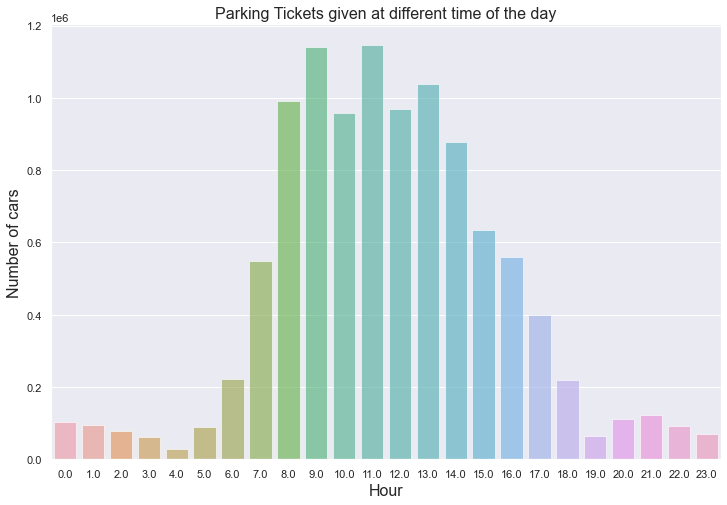

In [335]:
plt.figure(figsize=(12,8))
sns.barplot(x = ticket_per_hour['hour'], y = ticket_per_hour['Number of Tickets in Each Hour'], alpha=0.6)
plt.tick_params(labelbottom='on')
plt.ylabel('Number of cars', fontsize=16);
plt.xlabel('Hour', fontsize=16);
plt.title('Parking Tickets given at different time of the day', fontsize=16);

In [311]:
nyc_parking_2016['Violation County'].unique()

array(['Kings County (Brooklyn)', nan, 'Queens County (Queens)',
       'New York County (Manhattan)', 'Bronx County (The Bronx)',
       'Richmond County (Staten Island)'], dtype=object)

In [309]:
nyc_parking_2016['Violation County'] =  nyc_parking_2016['Violation County'].replace({'00000': 'New York County (Manhattan)', 
                                                                                       'BK': 'Bronx County (The Bronx)', 
                                                                                        'BRONX': 'Bronx County (The Bronx)', 
                                                                                        'BX': 'Bronx County (The Bronx)', 
                                                                                        'K': 'Kings County (Brooklyn)', 
                                                                                        'KING': 'Kings County (Brooklyn)', 
                                                                                        'KINGS': 'Kings County (Brooklyn)', 
                                                                                        'MN': 'New York County (Manhattan)', 
                                                                                        'NY': 'New York County (Manhattan)',
                                                                                        'Q': 'Queens County (Queens)', 
                                                                                        'QN': 'Queens County (Queens)', 
                                                                                        'QNS':'Queens County (Queens)', 
                                                                                        'QU': 'Queens County (Queens)', 
                                                                                        'QUEEN':'Queens County (Queens)', 
                                                                                        'R': 'Richmond County (Staten Island)', 
                                                                                        'ST': 'Richmond County (Staten Island)'})

In [310]:
ticket_per_county = nyc_parking_2016.groupby(['Violation County'])['Plate ID'].count()
ticket_per_county = ticket_per_county.to_frame().reset_index()
ticket_per_county = ticket_per_county.rename(columns={'Plate ID': 'Number of Tickets in Each County'})
ticket_per_county

,Violation County,Number of Tickets in Each County
0,Bronx County (The Bronx),1162365
1,Kings County (Brooklyn),2198294
2,New York County (Manhattan),3548977
3,Queens County (Queens),1895849
4,Richmond County (Staten Island),104212


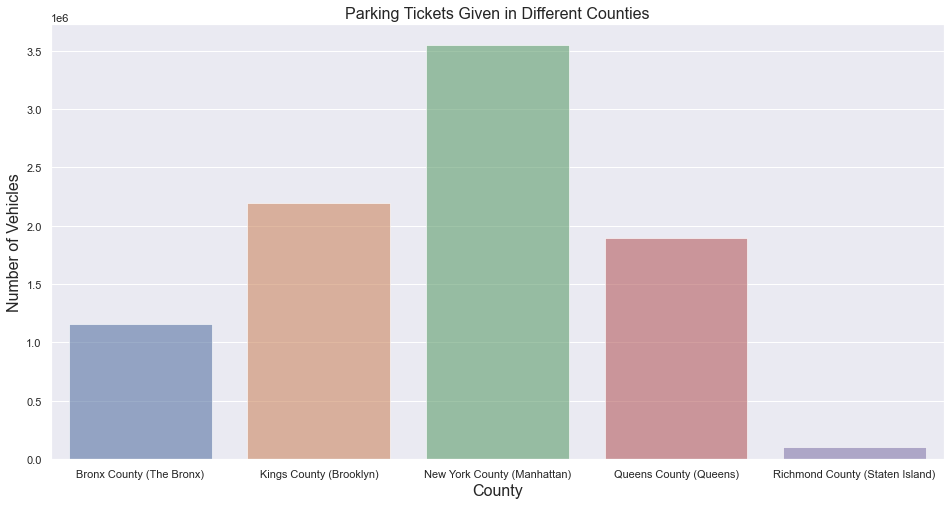

In [312]:
plt.figure(figsize=(16,8))
f = sns.barplot(x = ticket_per_county['Violation County'], y = ticket_per_county['Number of Tickets in Each County'], alpha=0.6)

plt.tick_params(labelbottom='on')
plt.ylabel('Number of Vehicles', fontsize=16);
plt.xlabel('County', fontsize=16);
plt.title('Parking Tickets Given in Different Counties', fontsize=16);

[stdout:0] 
Index(['NY', 'NJ', 'PA', 'CT', 'FL', 'MA', 'IN', 'VA', 'MD', 'NC', '99', 'IL',
       'GA', 'TX', 'AZ', 'ME', 'OH', 'CA', 'OK', 'SC', 'TN', 'MI', 'DE', 'MN',
       'RI', 'NH', 'AL', 'WA', 'VT', 'OR', 'ON', 'QB', 'WI', 'ID', 'KY', 'IA',
       'DC', 'MS', 'DP', 'CO', 'MO', 'NM', 'AR', 'LA', 'WV', 'NV', 'SD', 'NE',
       'UT', 'KS', 'NS', 'GV', 'AK', 'MT', 'ND', 'HI', 'WY', 'AB', 'PR', 'BC',
       'NB', 'PE', 'MB', 'SK', 'FO', 'MX', 'YT', 'NT'],
      dtype='object')
[stdout:1] Index([], dtype='object')
[stdout:2] Index([], dtype='object')
[stdout:3] Index([], dtype='object')


[output:0]

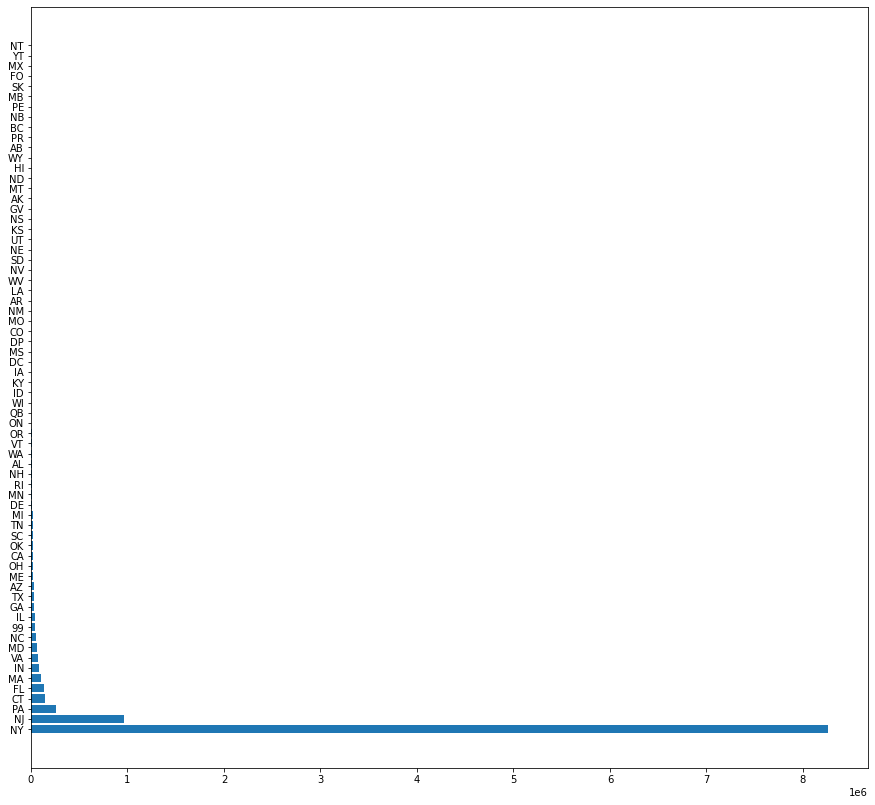

[output:1]

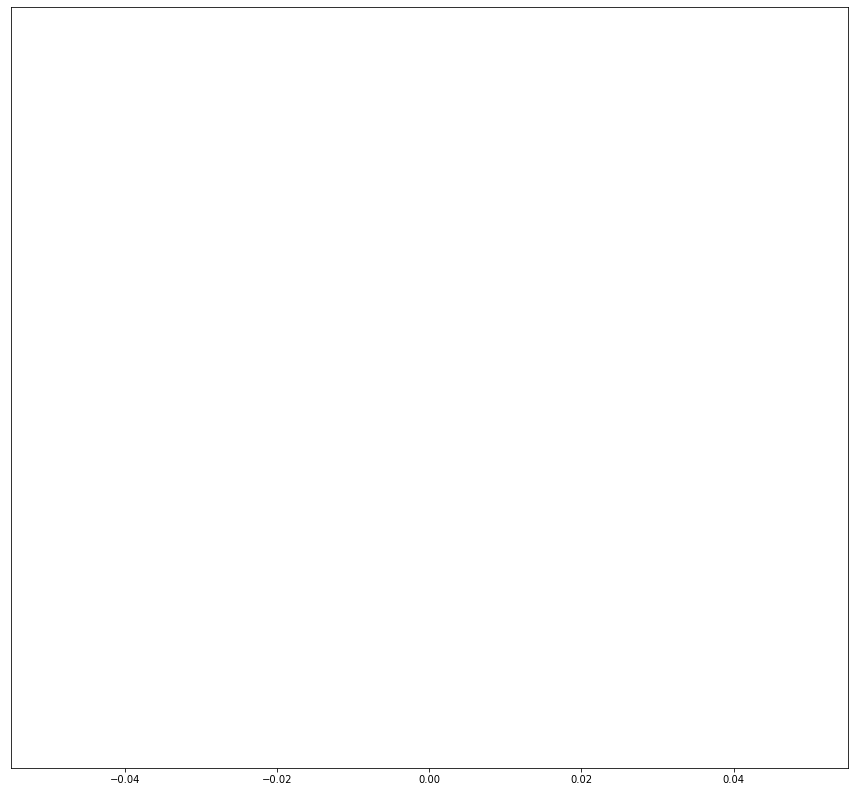

[output:2]

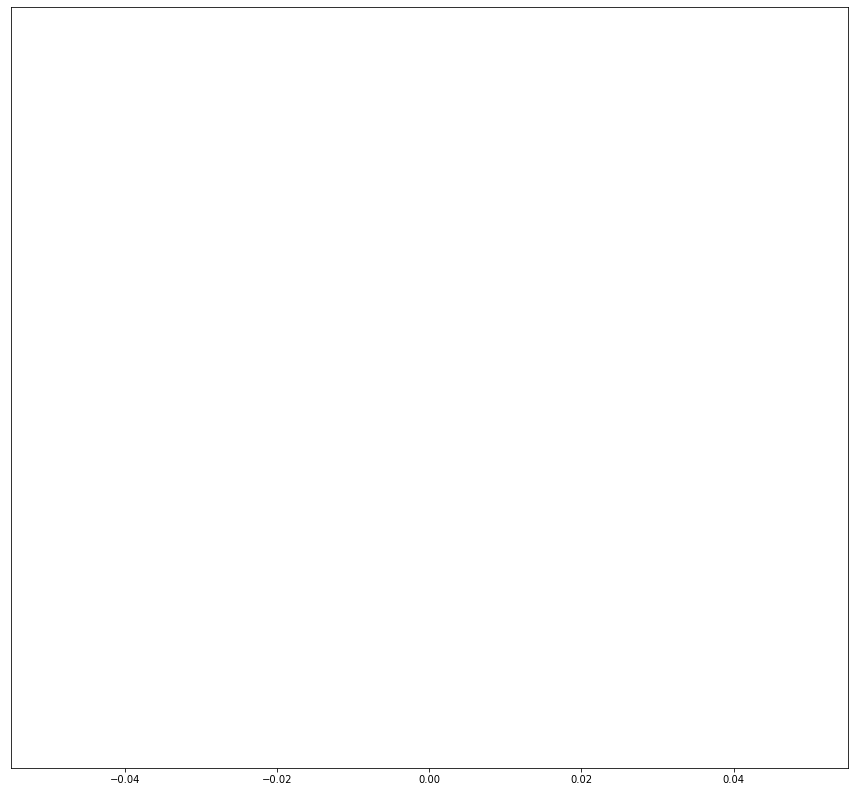

[output:3]

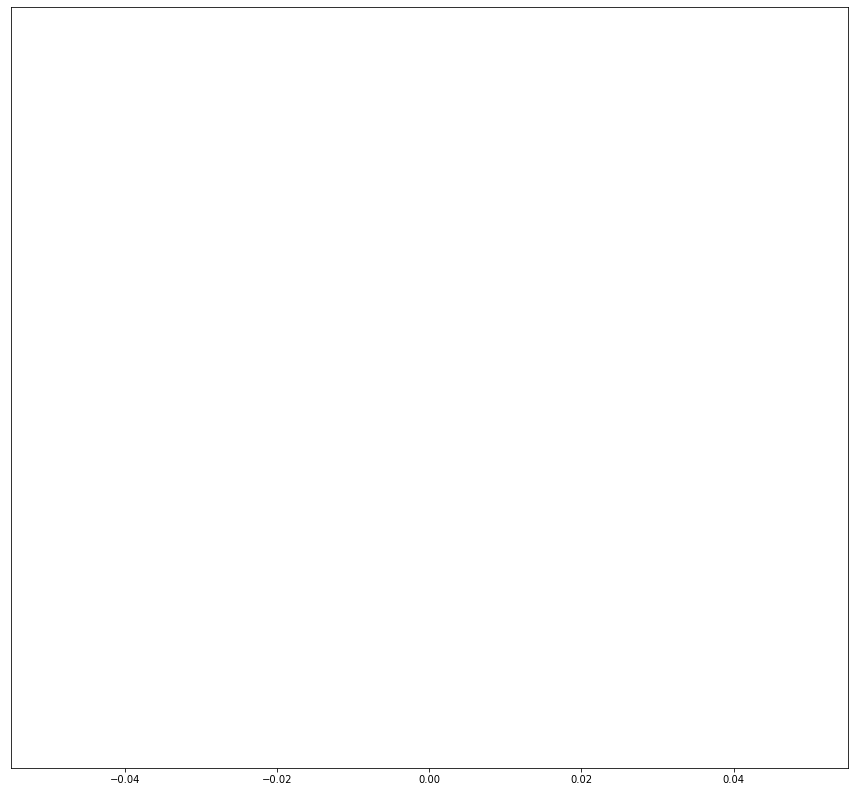

In [211]:
%%px

@bodo.jit(distributed=['nyc_parking_2016'], cache=True)
def mean_power(nyc_parking_2016):
    x_ticks = nyc_parking_2016['Registration State'].value_counts().index
    heights = nyc_parking_2016['Registration State'].value_counts()
    y_pos = np.arange(len(x_ticks))
    return bodo.gatherv(x_ticks), bodo.gatherv(heights), bodo.gatherv(y_pos)

x_ticks, heights, y_pos= mean_power(nyc_parking_2016)

fig = plt.figure(figsize=(15,14))
plt.barh(y_pos, heights)
plt.yticks(y_pos, x_ticks);
print(x_ticks)

[output:0]

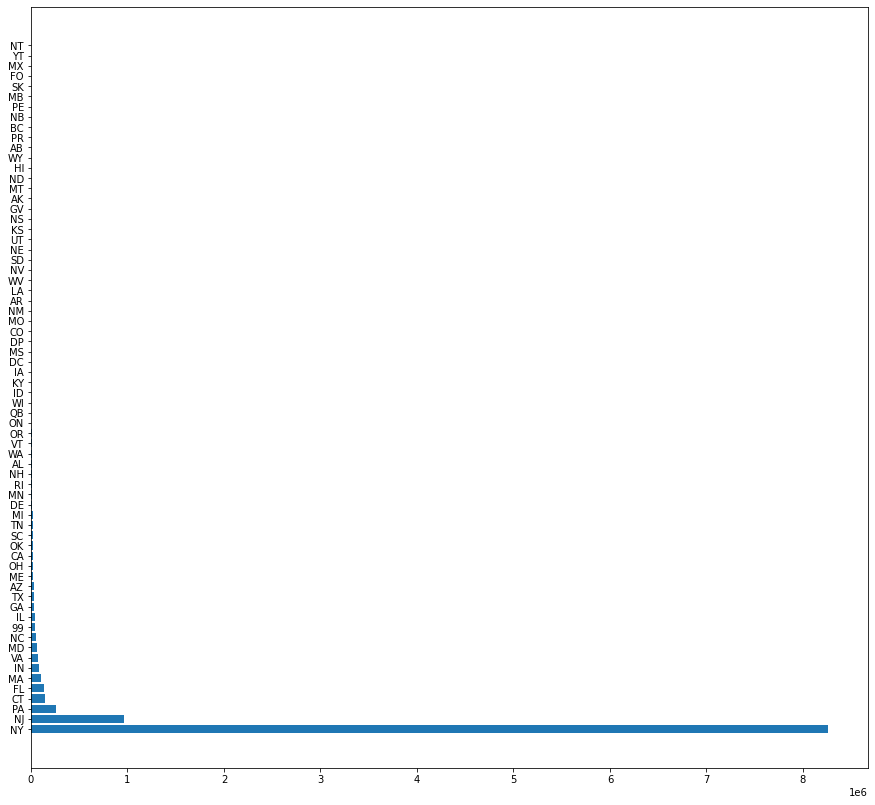

[output:1]

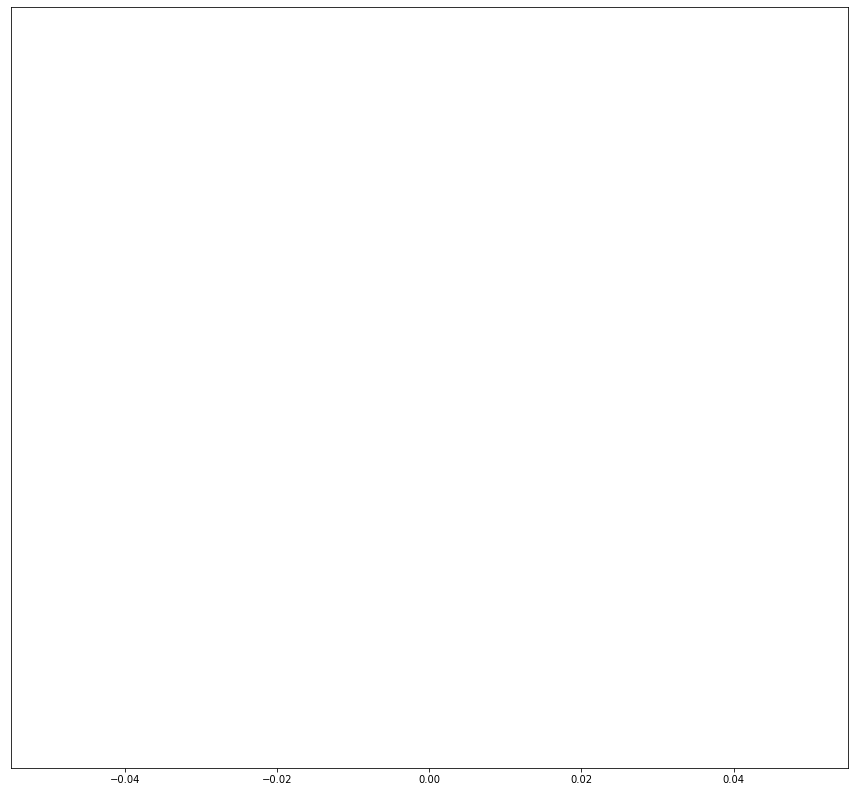

[output:2]

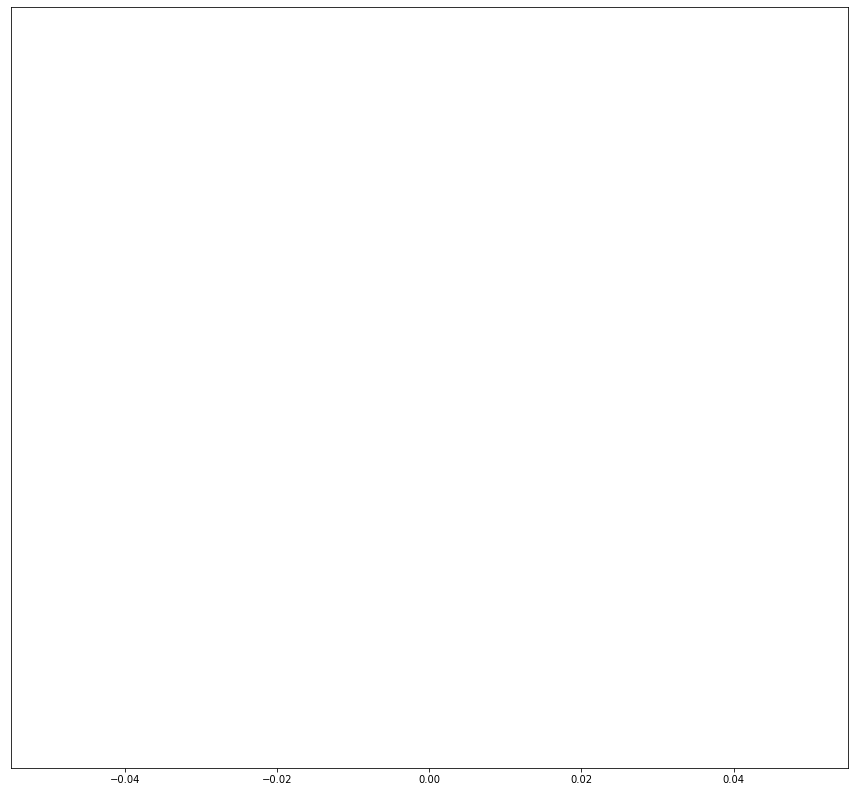

[output:3]

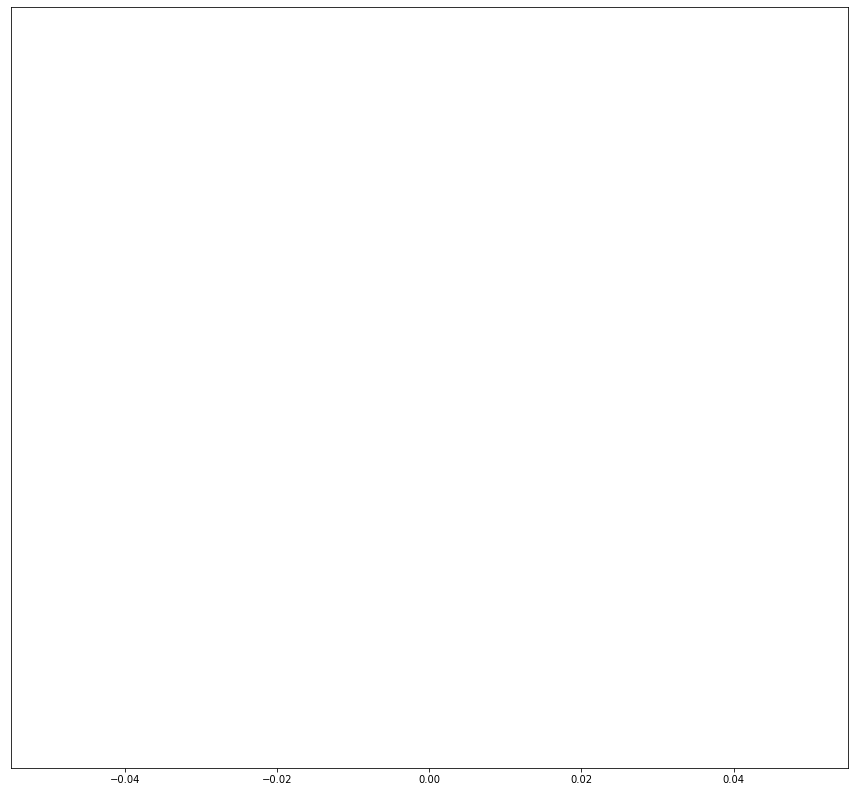

In [210]:
%%px

#x_ticks = nyc_parking_2016['Registration State'].value_counts().index
#heights = nyc_parking_2016['Registration State'].value_counts()
#y_pos = np.arange(len(x_ticks))
fig = plt.figure(figsize=(15,14))
#y_pos = view['y_pos'][0]
# Create horizontal bars
plt.barh(y_pos, heights)
 
# Create names on the y-axis
plt.yticks(y_pos, x_ticks);

In [189]:
%%px

@bodo.jit(distributed=['df1', 'df2', 'parking_total'], cache=True)
def concat(df1, df2):
    df2 = df2.astype(df1.dtypes)
    parking_total = pd.concat([df1, df2])
    
    return parking_total  

parking_total = concat(nyc_parking_2016, nyc_parking_2017)

CompositeError: one or more exceptions from call to method: execute
[0:execute]: BodoError: DataFrame.dtypes not supported yet

File "<ipython-input-98-c5d5d2b15625>", line 3:
def concat(df1, df2):
    df2 = df2.astype(df1.dtypes)
    ^

[1:execute]: BodoError: DataFrame.dtypes not supported yet

File "<ipython-input-98-c5d5d2b15625>", line 3:
def concat(df1, df2):
    df2 = df2.astype(df1.dtypes)
    ^

[2:execute]: BodoError: DataFrame.dtypes not supported yet

File "<ipython-input-98-c5d5d2b15625>", line 3:
def concat(df1, df2):
    df2 = df2.astype(df1.dtypes)
    ^

[3:execute]: BodoError: DataFrame.dtypes not supported yet

File "<ipython-input-98-c5d5d2b15625>", line 3:
def concat(df1, df2):
    df2 = df2.astype(df1.dtypes)
    ^


In [192]:
%%px

df1 = pd.DataFrame({"A": [2, 1, 1], "B": ['a', 'b', 'c']})
df2 = pd.DataFrame({"A": [2.0, 1.3, 1.6], "B": [1, 'b', 'c']})

In [193]:
%%px

@bodo.jit(distributed=['df1', 'df2', 'df'], cache=True)
def concat(df1, df2):
    
    df2 = df2.astype(df1.dtypes)
    df = pd.concat([df1, df2])
    
    return df  

df = concat(df1, df2)

CompositeError: one or more exceptions from call to method: execute
[0:execute]: BodoError: DataFrame.dtypes not supported yet

File "<ipython-input-102-81a0bece1ab0>", line 4:
def concat(df1, df2):
    <source elided>
    
    df2 = df2.astype(df1.dtypes)
    ^

[1:execute]: BodoError: DataFrame.dtypes not supported yet

File "<ipython-input-102-81a0bece1ab0>", line 4:
def concat(df1, df2):
    <source elided>
    
    df2 = df2.astype(df1.dtypes)
    ^

[2:execute]: BodoError: DataFrame.dtypes not supported yet

File "<ipython-input-102-81a0bece1ab0>", line 4:
def concat(df1, df2):
    <source elided>
    
    df2 = df2.astype(df1.dtypes)
    ^

[3:execute]: BodoError: DataFrame.dtypes not supported yet

File "<ipython-input-102-81a0bece1ab0>", line 4:
def concat(df1, df2):
    <source elided>
    
    df2 = df2.astype(df1.dtypes)
    ^


In [158]:
%%px

@bodo.jit(distributed=['df1', 'df2', 'parking_total'], cache=True)
def concat_and_group(df1, df2):
    parking_2016 = df1.groupby(['Issue Date','Violation County','Violation Precinct',
                                     'Violation Code'], as_index=False)['Summons Number'].count()
    parking_2017 = df2.groupby(['Issue Date','Violation County','Violation Precinct',
                                     'Violation Code'], as_index=False)['Summons Number'].count()
    parking_total = pd.concat([parking_2016, parking_2017])
    
    return parking_total  

parking_total = concat_and_group(nyc_parking_2016, nyc_parking_2017)

In [162]:
%%px

@bodo.jit(distributed=['df'], cache=True)
def clean_data(df):
    
    df = df.drop_duplicates()
    df = df.dropna()
    print(df.head(5))
    return df

parking_total = clean_data(parking_total)

[stdout:0] 
   Issue Date Violation County  Violation Precinct  Violation Code  \
1  2015-07-09                K                  79              21   
8  2015-06-11                K                  70              21   
17 2015-06-13               NY                  26              19   
19 2015-07-05               NY                  26              46   
20 2015-06-21               NY                  26              40   

    Summons Number  
1               86  
8                2  
17               2  
19               4  
20               1  


In [164]:
%%px

@bodo.jit(distributed=['df'], cache=True)
def elim_code_36(df):
    """
    Remove undefined violations (code 36)
    """
    start = time.time()
    df = df[df['Violation Code']!=36].sort_values('Summons Number',ascending=False)
    end = time.time()
    print("Eliminate undefined violations time: ", end - start)
    print(df.head())
    return df

parking_total = elim_code_36(parking_total)

[stdout:0] 
Eliminate undefined violations time:  4.279342965000978
       Issue Date Violation County  Violation Precinct  Violation Code  \
216552 2015-11-27                Q                 114              21   
592875 2016-06-19               BK                   0               7   
299608 2017-05-19               QN                   0               7   
592870 2016-06-19               QN                   0               7   
145332 2016-06-18               QN                   0               7   

        Summons Number  
216552            1165  
592875             910  
299608             907  
592870             891  
145332             889  


In [165]:
%%px

@bodo.jit(distributed=['df'], cache=True)
def remove_outliers(df):
    """
    Delete entries that have dates outside our dataset dates
    """
    start = time.time()
    df = df[(df['Issue Date'] >= '2016-01-01') & (df['Issue Date'] <= '2017-12-31')]
    end = time.time()
    print("Remove outliers time: ", (end-start))
    print(df.head())
    return df

parking_total = remove_outliers(parking_total)

[stdout:0] 
Remove outliers time:  0.15014941000117688
       Issue Date Violation County  Violation Precinct  Violation Code  \
592875 2016-06-19               BK                   0               7   
299608 2017-05-19               QN                   0               7   
592870 2016-06-19               QN                   0               7   
145332 2016-06-18               QN                   0               7   
146733 2016-06-26               BK                   0               7   

        Summons Number  
592875             910  
299608             907  
592870             891  
145332             889  
146733             888  


In [167]:
%%px

@bodo.jit(distributed=['df', 'df1'], cache=True)
def merge_violation_code(df, df1):
    """
    Merge violation information in the main_df
    """
    start = time.time()
    # left join main_df and violation_codes df so that there's more info on violation in main_df
    df = pd.merge(df, df1, on='Violation Code', how='left')
    # cast precincts as integers from floats (inadvertent type change by merge)
    df['Violation Precinct'] = df['Violation Precinct'].astype(int)
    end = time.time()
    print("Merge time: ", (end-start))
    print(df.head())
    return df

parking_total = merge_violation_code(parking_total, violation_codes)

[stdout:0] 
Merge time:  3.974519102001068
  Issue Date Violation County  Violation Precinct  Violation Code  \
0 2016-06-19               BK                   0               7   
1 2016-06-19               BK                   0               7   
2 2016-06-19               BK                   0               7   
3 2016-06-19               BK                   0               7   
4 2017-05-19               QN                   0               7   

   Summons Number                                         Definition  \
0             910  Vehicles photographed going through a red ligh...   
1             910  Vehicles photographed going through a red ligh...   
2             910  Vehicles photographed going through a red ligh...   
3             910  Vehicles photographed going through a red ligh...   
4             907  Vehicles photographed going through a red ligh...   

   manhattan_96_and_below  all_other_areas  
0                      50               50  
1                  

In [168]:
%%px

@bodo.jit(distributed=['df'], cache=True)
def calculate_total_summons(df):
    """
    Calculate the total summonses in dollars for a violation in a precinct on a day
    """
    start = time.time()
    #create column for portion of precinct 96th st. and below
    n = len(df)
    portion_manhattan_96_and_below = np.empty(n, np.int64)
    # NOTE: To run pandas, use this loop.
    # for i in range(n):
    for i in bodo.prange(n):
        x = df['Violation Precinct'].iat[i]
        if x < 22 or x == 23:
            portion_manhattan_96_and_below[i] = 1.0
        elif x == 22:
            portion_manhattan_96_and_below[i] = 0.75
        elif x == 24:
            portion_manhattan_96_and_below[i] = 0.5
        else: #other
            portion_manhattan_96_and_below[i] = 0
    df["portion_manhattan_96_and_below"] = portion_manhattan_96_and_below

    #create column for average dollar amount of summons based on location
    df['average_summons_amount'] = (df['portion_manhattan_96_and_below'] * df['manhattan_96_and_below']
                                     + (1 - df['portion_manhattan_96_and_below']) * df['all_other_areas'])

    #get total summons dollars by multiplying average dollar amount by number of summons given
    df['total_summons_dollars'] = df['Summons Number'] * df['average_summons_amount']
    df = df.sort_values(by=['total_summons_dollars'], ascending=False)
    end = time.time()
    print("Calculate Total Summons Time: ", (end-start))
    print(df.head())
    return df

parking_total = calculate_total_summons(parking_total)

[stdout:0] 
Calculate Total Summons Time:  5.265128350998566
     Issue Date Violation County  Violation Precinct  Violation Code  \
1156 2017-04-11               NY                  19              46   
1157 2017-04-11               NY                  19              46   
1158 2017-04-11               NY                  19              46   
1159 2017-04-11               NY                  19              46   
1272 2017-03-22               NY                  19              46   

      Summons Number                                         Definition  \
1156             554  Standing or parking on the roadway side of a v...   
1157             554  Standing or parking on the roadway side of a v...   
1158             554  Standing or parking on the roadway side of a v...   
1159             554  Standing or parking on the roadway side of a v...   
1272             544  Standing or parking on the roadway side of a v...   

      manhattan_96_and_below  all_other_areas  portion_

In [169]:
%%px

@bodo.jit(distributed=['df', 'precinct_offenses_df'], cache=True)
def aggregate(df):
    '''function that aggregates and filters data
    e.g. total violations by precinct
    '''
    start = time.time()
    filtered_dataset = df[['Violation Precinct','Summons Number', 'total_summons_dollars']]
    precinct_offenses_df = filtered_dataset.groupby(by=['Violation Precinct']).sum().reset_index().fillna(0)
    end = time.time()
    print("Aggregate code time: ", (end-start))
    print(precinct_offenses_df.head())
    return precinct_offenses_df

precinct_offenses_df = aggregate(parking_total)

[stdout:0] 
Aggregate code time:  5.616522307995183
   Violation Precinct  Summons Number  total_summons_dollars
0                   0         2842160              184600860
1                  90          817892               54334040
2                 104          721765               47758820
3                  70         1124560               69821660
4                 110          720874               46741660
